<a href="https://colab.research.google.com/github/NadaDewata/Tugas-2/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

data = pd.read_csv("/content/NetflixOriginals.csv", encoding='latin-1')
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [ ]:
data=pd.read_csv('/content/NetflixOriginals.csv', encoding='latin-1')
data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [ ]:
is_na = data.isna().all(axis=0)
is_na

Title         False
Genre         False
Premiere      False
Runtime       False
IMDB Score    False
Language      False
dtype: bool

In [ ]:
data_any = data.dropna(axis=1, how='any')
data_any.shape[1]

display(data_any)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [ ]:
data_duplicate = data.drop_duplicates(inplace = True)
print(data_duplicate)

None


In [ ]:
code = 1
for I in data.loc[:, 'Genre'].unique():
  data['Genre'].loc[data['Genre']==1] = code
  code += 1

In [ ]:
data['Genre'] = data['Genre'].astype('str')
data

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [ ]:
from sklearn.preprocessing import StandardScaler

data_standarded = pd.DataFrame(data)
data_standarded = pd.concat([data_standarded, data['Genre']], ignore_index=True, axis = 1)
data_standarded

,0,1,2,3,4,5,6
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,Documentary
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,Thriller
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,Science fiction/Drama
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,Horror thriller
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,Mystery
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,Concert Film
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,Documentary
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,One-man show
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,Documentary


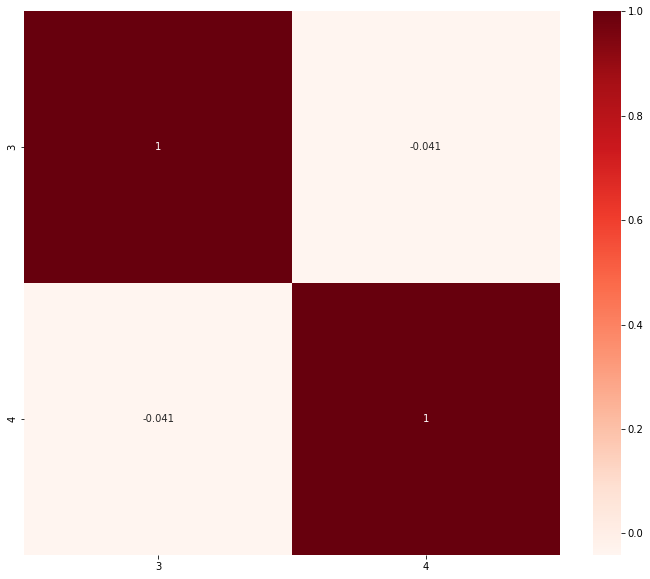

In [ ]:
corr = data_standarded.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
data_reduksi = data_any.loc[data_any['Genre'] == 'Documentary']
data_reduksi

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
10,Searching for Sheela,Documentary,"April 22, 2021",58,4.1,English
15,After the Raid,Documentary,"December 19, 2019",25,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,"September 13, 2019",64,4.4,English
30,After Maria,Documentary,"May 24, 2019",37,4.6,English/Spanish
...,...,...,...,...,...,...
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [ ]:
data_any.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [ ]:
genre = data.Genre.value_counts().nlargest(20)
genre

Documentary                 159
Drama                        77
Comedy                       49
Romantic comedy              39
Thriller                     33
Comedy-drama                 14
Crime drama                  11
Biopic                        9
Horror                        9
Action                        7
Romance                       6
Aftershow / Interview         6
Concert Film                  6
Action comedy                 5
Animation                     5
Romantic drama                5
Psychological thriller        4
Science fiction               4
Science fiction/Thriller      4
Animation / Short             4
Name: Genre, dtype: int64

In [ ]:
  score_10 = data[data['IMDB Score']>=8]

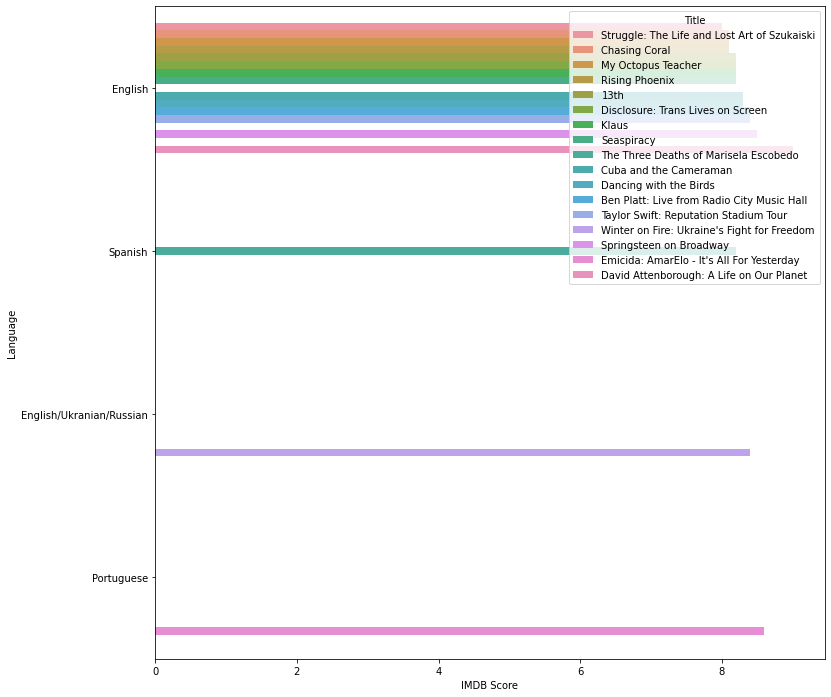

In [ ]:
plt.figure(figsize = (12,12))
sns.barplot(x = 'IMDB Score', y = 'Language',hue ='Title', data = score_10)

In [ ]:
fig = px.bar(score_10, x='Genre', y= 'IMDB Score', color = 'Title')
fig.show()

In [ ]:
code = 1
for i in data.loc[:,'Genre'].unique():
  data['Genre'].loc[data['Genre']==i] = code
  code += 1
data

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Title,Genre,IMDB Score
0,Enter the Anime,1,2.5
1,Dark Forces,2,2.6
2,The App,3,2.6
3,The Open House,4,3.2
4,Kaali Khuhi,5,3.4
...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,84,8.4
580,Winter on Fire: Ukraine's Fight for Freedom,1,8.4
581,Springsteen on Broadway,58,8.5
582,Emicida: AmarElo - It's All For Yesterday,1,8.6


In [ ]:
data['Genre'] = data['Genre'].astype('int64')
data

,Title,Genre,IMDB Score
0,Enter the Anime,1,2.5
1,Dark Forces,2,2.6
2,The App,3,2.6
3,The Open House,4,3.2
4,Kaali Khuhi,5,3.4
...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,84,8.4
580,Winter on Fire: Ukraine's Fight for Freedom,1,8.4
581,Springsteen on Broadway,58,8.5
582,Emicida: AmarElo - It's All For Yesterday,1,8.6


In [ ]:
from sklearn.preprocessing import StandardScaler

data_standarded = pd.DataFrame(data)
data_standarded = pd.concat([data_standarded, data['Genre']], ignore_index=True, axis=1)
data_standarded

,0,1,2,3
0,Enter the Anime,1,2.5,1
1,Dark Forces,2,2.6,2
2,The App,3,2.6,3
3,The Open House,4,3.2,4
4,Kaali Khuhi,5,3.4,5
...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,84,8.4,84
580,Winter on Fire: Ukraine's Fight for Freedom,1,8.4,1
581,Springsteen on Broadway,58,8.5,58
582,Emicida: AmarElo - It's All For Yesterday,1,8.6,1


In [ ]:
genre_high = data[data['IMDB Score']>8][['Genre','Title', 'IMDB Score','Language', 'Runtime', 'Premiere']].sort_values('IMDB Score', ascending = True)

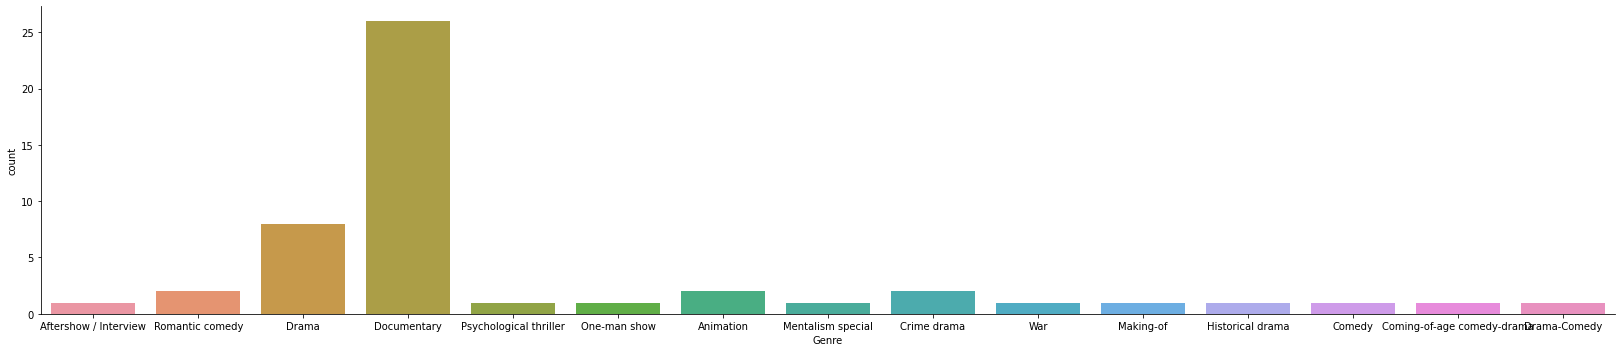

In [ ]:
sns.catplot(x="Genre", kind="count", data=genre_high[:50], aspect= 50.7/11.2)

In [ ]:
fig = px.bar(genre_high[:100], x='Genre', y= 'IMDB Score', color = 'Title')
fig.show()

In [ ]:
fig = px.bar(genre_high[:50], x='Language', y= 'IMDB Score', color = 'Title')
fig.show()


In [ ]:
fig = px.bar(genre_high[:50], x='Runtime', y= 'IMDB Score', color = 'Title')
fig.show()


In [ ]:
fig = px.bar(genre_high[:100], x='Premiere', y= 'IMDB Score', color= 'Title')
fig.show()


In [ ]:
top_20_lang = data.Language.value_counts().nlargest(20)
fig = px.bar(data_frame=top_20_lang, x=top_20_lang.index, y=top_20_lang.values, labels={"y":"Total Movie", "index":"Language"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()

In [ ]:
genre = data.Genre.value_counts().nlargest(20)
fig = px.bar(data_frame=genre, x=genre.index, y=genre.values, labels={"y":"Number of Movies from the Genre", "index":"Genres"})
fig.update_layout(xaxis={"categoryorder":"total descending"})

fig.show()

In [ ]:
fig = px.histogram(data_frame=data, x="Runtime", title="Runtime of Programs")

fig.show()


In [ ]:
data["Date"] = pd.to_datetime(data.Premiere)
data["Year"] = data["Date"].dt.year
data["Year_Month"] = data["Date"].dt.strftime("%Y-%m")

year = data.Year.value_counts()

fig = px.bar(data_frame=data, x=year.index, y=year.values, labels={"y":"Count of Movies per each Year", "x":"Year"})
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()